In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Sales Transaction v.4a.csv\Sales Transaction v.4a.csv")


In [3]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [5]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [6]:
df.shape

(536350, 8)

In [7]:
print('Duplicate',df.duplicated().sum())

Duplicate 5200


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.7+ MB


In [10]:
df = df.dropna(subset = ['CustomerNo'])

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(531095, 8)

In [13]:
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531095 non-null  object        
 1   Date           531095 non-null  datetime64[ns]
 2   ProductNo      531095 non-null  object        
 3   ProductName    531095 non-null  object        
 4   Price          531095 non-null  float64       
 5   Quantity       531095 non-null  int64         
 6   CustomerNo     531095 non-null  float64       
 7   Country        531095 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [15]:
df['TotalSales'] = df['Price'] * df['Quantity']

In [16]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalSales
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64


In [17]:
total_sales = df['TotalSales'].sum()
print(total_sales)

60134589.269999996


In [18]:
unique_products = df['ProductNo'].nunique()
print(unique_products)

3767


In [19]:
unique_customers = df['CustomerNo'].nunique()
print(unique_customers)

4738


In [20]:
unique_countries = df['Country'].nunique()
print(unique_countries)

38


In [21]:
top_products = df.groupby(['ProductName','ProductNo'])['TotalSales'].sum().sort_values(ascending = False).head(10)
print(top_products)

ProductName                         ProductNo
Popcorn Holder                      22197        583075.23
World War 2 Gliders Asstd Designs   84077        556157.63
Paper Craft Little Birdie           23843        501359.05
Cream Hanging Heart T-Light Holder  85123A       451163.73
Assorted Colour Bird Ornament       84879        419557.68
Pack Of 72 Retrospot Cake Cases     21212        388180.66
Rabbit Night Light                  23084        327293.83
Jumbo Bag Red Retrospot             85099B       289853.95
Regency Cakestand 3 Tier            22423        288752.33
Mini Paint Set Vintage              22492        284870.92
Name: TotalSales, dtype: float64


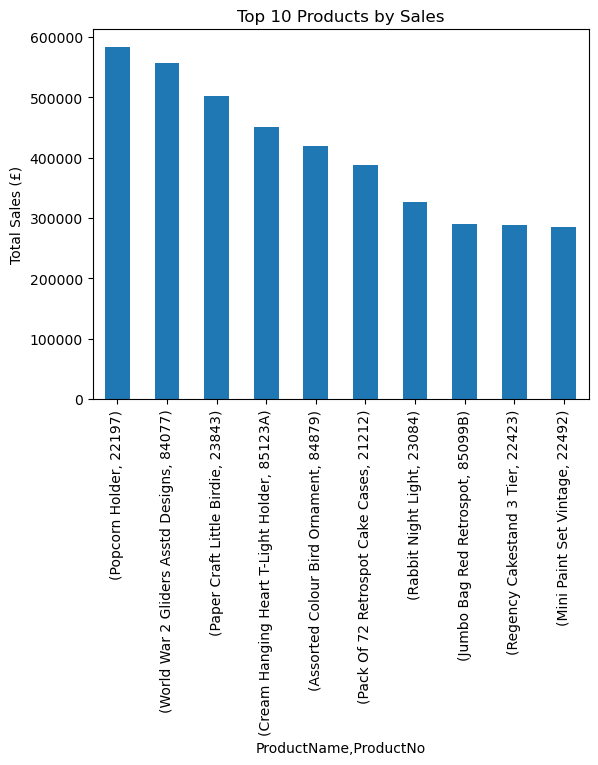

In [22]:
top_products.plot(kind='bar', title='Top 10 Products by Sales')
plt.ylabel('Total Sales (£)')
plt.show()

In [23]:
sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending = False).head(10)
print(sales_by_country)

Country
United Kingdom    49855388.84
Netherlands        2147811.39
EIRE               1659053.51
Germany            1348561.75
France             1316144.75
Australia           988562.45
Sweden              396042.61
Switzerland         358146.32
Japan               283293.47
Belgium             271346.98
Name: TotalSales, dtype: float64


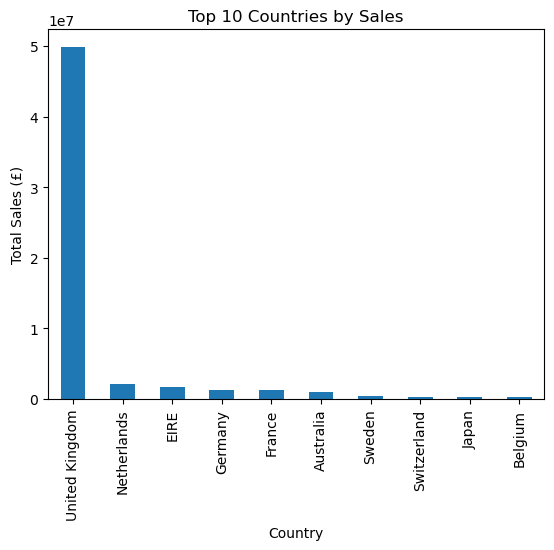

In [24]:
sales_by_country.plot(kind='bar', title='Top 10 Countries by Sales')
plt.ylabel('Total Sales (£)')

plt.show()

In [25]:
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum()
print(monthly_sales)

YearMonth
2018-12    4217281.53
2019-01    3638948.12
2019-02    3292324.69
2019-03    4340035.60
2019-04    3406002.17
2019-05    4521986.96
2019-06    4404297.96
2019-07    4501972.15
2019-08    4609655.77
2019-09    6529427.35
2019-10    6965035.30
2019-11    7712905.93
2019-12    1994715.74
Freq: M, Name: TotalSales, dtype: float64


In [26]:
start_month = df['YearMonth'].min()
end_month = df['YearMonth'].max()

print("Sales data starts from:", start_month)
print("Sales data ends at:", end_month)

Sales data starts from: 2018-12
Sales data ends at: 2019-12


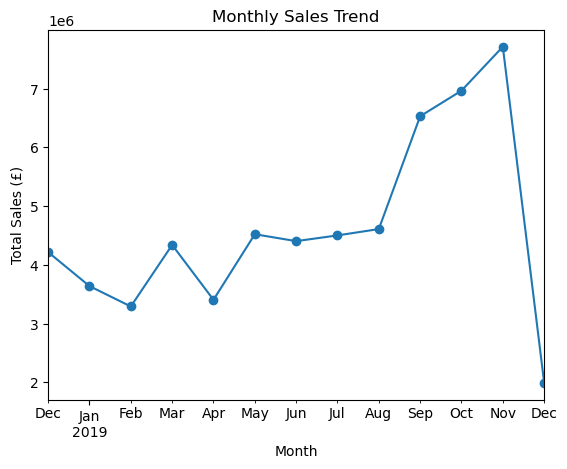

In [27]:
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel('Total Sales (£)')
plt.xlabel('Month')
plt.show()

In [28]:
top_customers = df.groupby('CustomerNo')['TransactionNo'].nunique().sort_values(ascending = False).head(10)
print(top_customers)

CustomerNo
14911.0    241
12748.0    218
17841.0    170
14606.0    125
13089.0    119
15311.0    118
12971.0     88
13408.0     75
14646.0     74
16029.0     66
Name: TransactionNo, dtype: int64


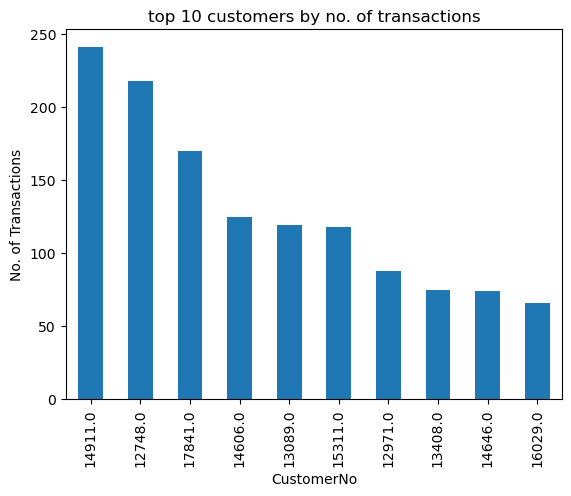

In [29]:
top_customers.plot(kind = 'bar', title = 'top 10 customers by no. of transactions')
plt.ylabel ('No. of Transactions')
plt.show()

In [30]:
df.to_csv('eda_done_cleaned_data.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531095 non-null  object        
 1   Date           531095 non-null  datetime64[ns]
 2   ProductNo      531095 non-null  object        
 3   ProductName    531095 non-null  object        
 4   Price          531095 non-null  float64       
 5   Quantity       531095 non-null  int64         
 6   CustomerNo     531095 non-null  float64       
 7   Country        531095 non-null  object        
 8   TotalSales     531095 non-null  float64       
 9   YearMonth      531095 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 44.6+ MB


In [32]:
products = df[['ProductNo','ProductName']].drop_duplicates()
products.to_csv('only_products_psk.csv',index = False)

In [33]:
customers = df[['CustomerNo']].drop_duplicates()
customers.to_csv('only_customers_psk.csv',index = False)

In [34]:
countries = df[['Country']].drop_duplicates().rename(columns={'Country':'CountryName'})
countries.to_csv('only_countries_psk.csv',index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531095 non-null  object        
 1   Date           531095 non-null  datetime64[ns]
 2   ProductNo      531095 non-null  object        
 3   ProductName    531095 non-null  object        
 4   Price          531095 non-null  float64       
 5   Quantity       531095 non-null  int64         
 6   CustomerNo     531095 non-null  float64       
 7   Country        531095 non-null  object        
 8   TotalSales     531095 non-null  float64       
 9   YearMonth      531095 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 44.6+ MB


(531095, 10)

,CustomerNo,Recency
2447,15350.0,374
4578,18074.0,374
4536,18011.0,374
4457,17908.0,374
442,12791.0,374
...,...,...
2810,15804.0,1
379,12713.0,1
352,12680.0,1
4082,17428.0,1


,CustomerNo,Frequency
2093,14911.0,241
409,12748.0,218
4402,17841.0,170
1857,14606.0,125
670,13089.0,119
...,...,...
16,12078.0,1
17,12080.0,1
18,12081.0,1
19,12082.0,1


,CustomerNo,Monetary
1887,14646.0,2108959.95
4599,18102.0,897137.36
126,12415.0,895267.24
4098,17450.0,876447.01
2093,14911.0,872608.57
...,...,...
4175,17548.0,-1498.20
3982,17307.0,-1632.96
3548,16742.0,-1714.91
3169,16252.0,-1921.72
